In [112]:
# Набор данных: список пассажиров Титаника
#Источник: https://www.kaggle.com/datasets/brendan45774/test-file
#Характер данных: реальные

"""
Список атрибутов:
PassengerId - Id пассажира (тип Int)
Survived - 1=выжил 0=мертв (тип Int)
Pclass - Номер класса пассажира (тип Int)
Name - Имя пассажира (тип String)
Sex - Пол пассажира (тип String)
Age - Возраст пассажира (тип Float)
SibSp - Количество братьев/сестер/cупруга на борту Титаника (тип Int)
Parch - Количество родителей/детей на борту Титаника (тип Int)
Ticket - Номер билета (тип String)
Fare - Цена билета (тип Float)
Cabin - номер кабины (тип Float)
Embarked - Порт, в котором произошла посадка на борт Титаника (тип String)
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import math
from sklearn.cluster import KMeans


py.offline.init_notebook_mode(connected=True)

In [113]:
print("Загрузка данных...\n")
df = pd.read_csv('tested.csv')
df = df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket','Embarked','Cabin'])
print(df)

Загрузка данных...

     Survived  Pclass   Age  SibSp  Parch      Fare
0           0       3  34.5      0      0    7.8292
1           1       3  47.0      1      0    7.0000
2           0       2  62.0      0      0    9.6875
3           0       3  27.0      0      0    8.6625
4           1       3  22.0      1      1   12.2875
..        ...     ...   ...    ...    ...       ...
413         0       3   NaN      0      0    8.0500
414         1       1  39.0      0      0  108.9000
415         0       3  38.5      0      0    7.2500
416         0       3   NaN      0      0    8.0500
417         0       3   NaN      1      1   22.3583

[418 rows x 6 columns]


In [114]:
"""
Создадим новый аттрибут Alone, который будет равен 0, если на корабле с пассажиром был кто-то из его семьи.
Если нет, то аттрибут равен 1
"""
df['Alone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)
df['Alone'] = df['Alone'].astype(int)
print(df)

     Survived  Pclass   Age  SibSp  Parch      Fare  Alone
0           0       3  34.5      0      0    7.8292      1
1           1       3  47.0      1      0    7.0000      0
2           0       2  62.0      0      0    9.6875      1
3           0       3  27.0      0      0    8.6625      1
4           1       3  22.0      1      1   12.2875      0
..        ...     ...   ...    ...    ...       ...    ...
413         0       3   NaN      0      0    8.0500      1
414         1       1  39.0      0      0  108.9000      1
415         0       3  38.5      0      0    7.2500      1
416         0       3   NaN      0      0    8.0500      1
417         0       3   NaN      1      1   22.3583      0

[418 rows x 7 columns]


In [115]:
#Узнаем количество пропущенных значений
print("Среднее значение:\n")
for index, col in enumerate(df.columns):
    mean = df[col].mean()
    print(col, "-", mean)
print("\nПропущенные значения:\n")
for index, col in enumerate(df.columns):
    missing_data = df[col].isnull().sum()
    print(col, "-", missing_data)

Среднее значение:

Survived - 0.36363636363636365
Pclass - 2.2655502392344498
Age - 30.272590361445783
SibSp - 0.4473684210526316
Parch - 0.3923444976076555
Fare - 35.627188489208635
Alone - 0.6052631578947368

Пропущенные значения:

Survived - 0
Pclass - 0
Age - 86
SibSp - 0
Parch - 0
Fare - 1
Alone - 0


In [116]:
#Заполним пропущенные значения средним значением аттрибута
df['Age'].fillna(30, inplace=True)
df['Fare'].fillna(35, inplace=True)
print(df)

print("\nПропущенные значения:\n")
for index, col in enumerate(df.columns):
    missing_data = df[col].isnull().sum()
    print(col, "-", missing_data)
    
#Удалим выбросы, выявленные в Лабораторной №1
df = df[df['Age'] <= 70]
df = df[df['Fare'] <= 400]
df = df[df['Parch'] <= 7]

     Survived  Pclass   Age  SibSp  Parch      Fare  Alone
0           0       3  34.5      0      0    7.8292      1
1           1       3  47.0      1      0    7.0000      0
2           0       2  62.0      0      0    9.6875      1
3           0       3  27.0      0      0    8.6625      1
4           1       3  22.0      1      1   12.2875      0
..        ...     ...   ...    ...    ...       ...    ...
413         0       3  30.0      0      0    8.0500      1
414         1       1  39.0      0      0  108.9000      1
415         0       3  38.5      0      0    7.2500      1
416         0       3  30.0      0      0    8.0500      1
417         0       3  30.0      1      1   22.3583      0

[418 rows x 7 columns]

Пропущенные значения:

Survived - 0
Pclass - 0
Age - 0
SibSp - 0
Parch - 0
Fare - 0
Alone - 0


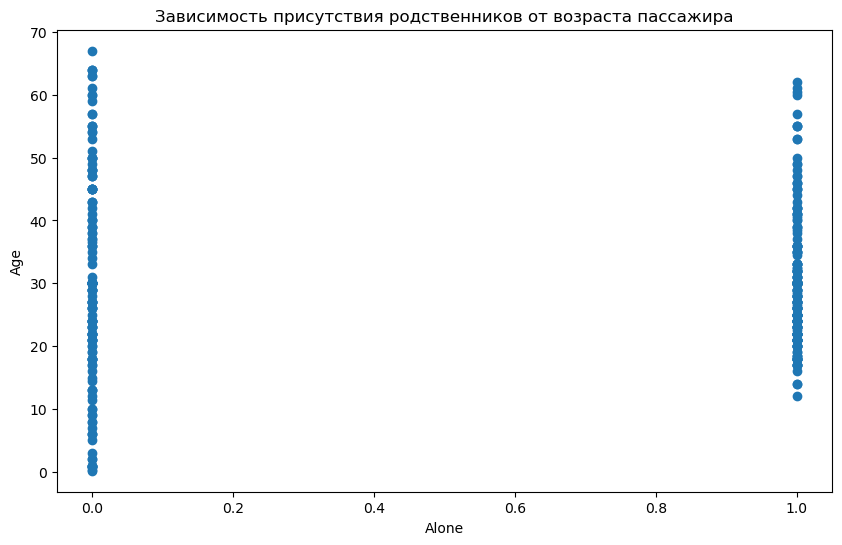

In [117]:
# Построение графика зависимости №1
plt.figure(figsize=(10, 6))
plt.scatter(df['Alone'], df['Age'])
plt.title('Зависимость присутствия родственников от возраста пассажира')
plt.xlabel('Alone')
plt.ylabel('Age')
plt.show()
#Можем увидеть, что более молодые пассажиры чаще были в компании с родственниками

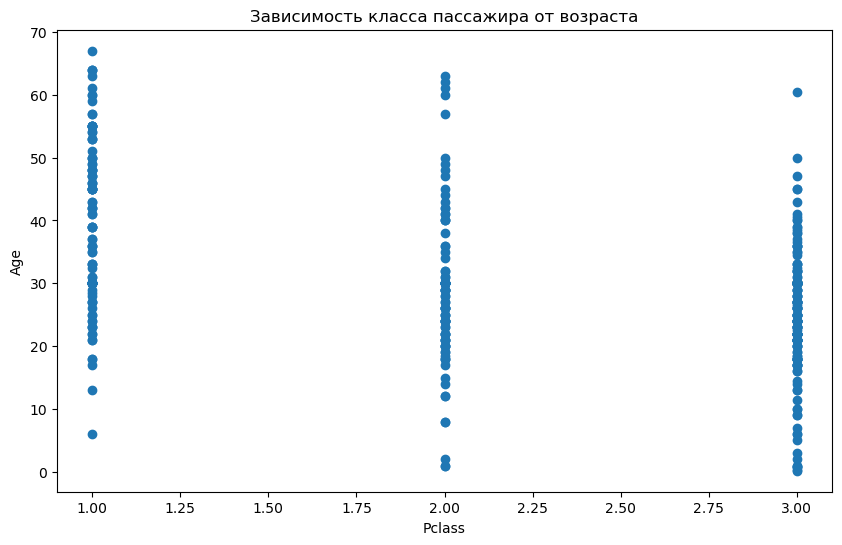

In [118]:
# Построение графика зависимости №2
plt.figure(figsize=(10, 6))
plt.scatter(df['Pclass'], df['Age'])
plt.title('Зависимость класса пассажира от возраста')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()
#Можем увидеть, что есть прямая зависимость класса пассажира от его возраста

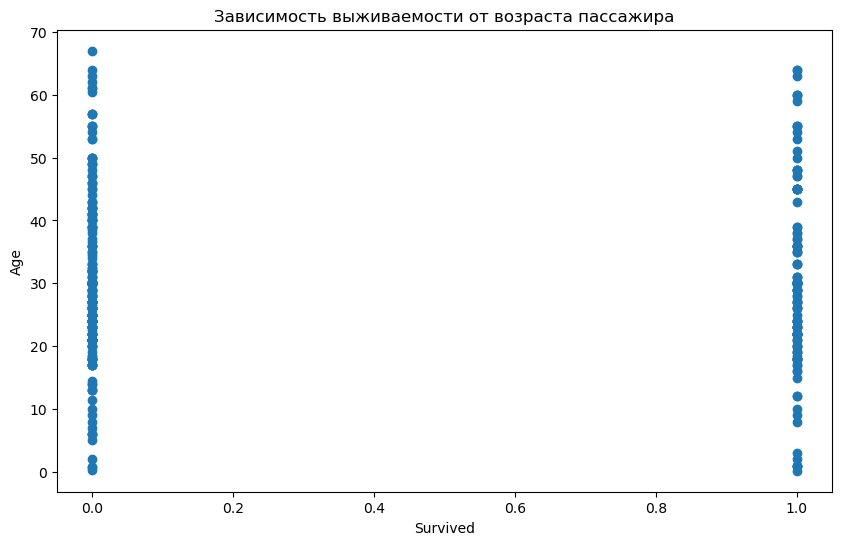

In [123]:
# Построение графика зависимости №3
plt.figure(figsize=(10, 6))
plt.scatter(df['Survived'], df['Age'])
plt.title('Зависимость выживаемости от возраста пассажира')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()
#Можем увидеть,что особой зависимости выживаемости от возраста нет

G:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.

G:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



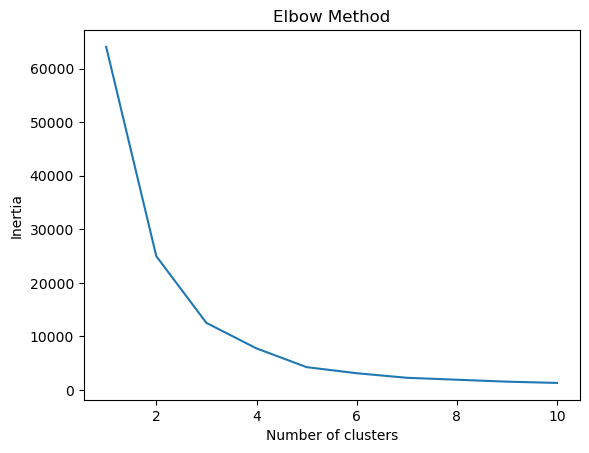

In [124]:
X3 = df[['Age' , 'Survived' ,'Pclass']].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [125]:
#По графику видим, что наиболее подходящее число кластеров для KMeans будет равно 5
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Survived'],
    z= df['Pclass'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Survived'),
            zaxis = dict(title  = 'Pclass')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [127]:
"""
Выводы:
В ходе работы я дополнил Data set новым аттрибутом, получил новые сведения касательно зависимости нескольких аттрибутов
друг от друга, а также разобрался с методом кластеризации данных.
"""

'\nВыводы:\nВ ходе работы я дополнил Data set новым аттрибутом, получил новые сведения касательно зависимости нескольких аттрибутов\nдруг от друга, а также разобрался с методом кластеризации данных.\n'